In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
n=100

In [3]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.3466,  1.0000],
        [ 0.8407,  1.0000],
        [ 0.4867,  1.0000],
        [-0.8242,  1.0000],
        [-0.7302,  1.0000]])

In [4]:
a = tensor(3.,2)
a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

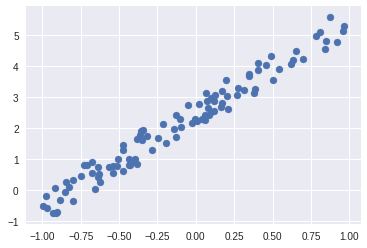

In [6]:
plt.scatter(x[:,0],y)

You want to find parameters (weights) a such that you minimize the error between the points and the line x@a. Note that here a is unknown. For a regression problem the most common error function or loss function is the mean squared error.

In [0]:
def mse(y_hat, y): 
  return ((y_hat-y)**2).mean()

Suppose we believe a = (-1.0,1.0) then we can compute y_hat which is our prediction and then compute our error

In [8]:
a = tensor(-1.,1)
y_hat = x@a
mse(y_hat, y)

tensor(5.4317)

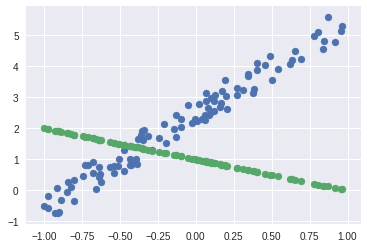

In [9]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the model (linear regression) and the evaluation criteria (or loss function). Now we need to handle optimization; that is, how do we find the best values for a? How do we find the best fitting linear regression.

# **Gradient Descent**

We would like to find the values of a that minimize mse_loss.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

In [10]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y,y_hat)
  if t%10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [22]:
lr = 1e-1
for t in range(100): update()

tensor(0.0886, grad_fn=<MeanBackward1>)
tensor(0.0886, grad_fn=<MeanBackward1>)
tensor(0.0886, grad_fn=<MeanBackward1>)
tensor(0.0886, grad_fn=<MeanBackward1>)
tensor(0.0886, grad_fn=<MeanBackward1>)
tensor(0.0886, grad_fn=<MeanBackward1>)
tensor(0.0886, grad_fn=<MeanBackward1>)
tensor(0.0886, grad_fn=<MeanBackward1>)
tensor(0.0886, grad_fn=<MeanBackward1>)
tensor(0.0886, grad_fn=<MeanBackward1>)


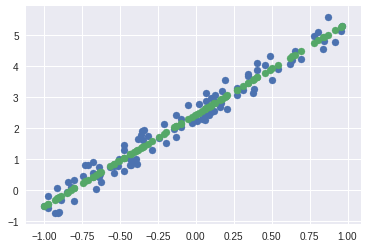

In [17]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

In [18]:
mse(x@a,y)

tensor(0.0886, grad_fn=<MeanBackward1>)

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [20]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)